<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Clustering


### Contexto del Problema

Eres un científico de datos contratado por una federación deportiva internacional que desea mejorar sus programas de entrenamiento personalizados. La federación maneja una gran variedad de atletas que participan en diferentes disciplinas deportivas, y cada uno tiene necesidades de entrenamiento y desarrollo únicas. Para maximizar el rendimiento y mejorar la efectividad de los programas de entrenamiento, la federación quiere segmentar a sus atletas en grupos homogéneos basados en sus características físicas, habilidades y comportamientos de entrenamiento.


### Los datos

- **name**: Nombre del atleta. Es una variable categórica que identifica a cada atleta de manera única.

- **gender**: Género del atleta. Es una variable categórica que indica si el atleta es masculino ("Male") o femenino ("Female").

- **age**: Edad del atleta. Es una variable numérica que representa la edad del atleta en años.

- **height**: Altura del atleta. Es una variable numérica que representa la altura del atleta en centímetros.

- **nationality**: Nacionalidad del atleta. Es una variable categórica que indica el país de origen del atleta.

- **weight**: Peso del atleta. Es una variable numérica que representa el peso del atleta en kilogramos.

- **sports**: Deportes que practica el atleta. Es una variable categórica que puede contener múltiples valores (deportes) separados por comas.

- **hours_per_day**: Horas de entrenamiento por día. Es una variable numérica que indica el número promedio de horas que el atleta entrena cada día.

- **strength**: Fuerza del atleta. Es una variable numérica que representa la evaluación de la fuerza del atleta en una escala (por ejemplo, de 1 a 10).

- **agility**: Agilidad del atleta. Es una variable numérica que representa la evaluación de la agilidad del atleta en una escala (por ejemplo, de 1 a 10).

- **mental**: Capacidad mental del atleta. Es una variable numérica que representa la evaluación de la capacidad mental del atleta en una escala (por ejemplo, de 1 a 10).

- **federation**: Federación a la que pertenece el atleta. Es una variable categórica que indica la organización deportiva a la que está afiliado el atleta.

- **year_start**: Año de inicio. Es una variable numérica que indica el año en que el atleta comenzó su carrera o se unió a la federación.

- **rank**: Rango del atleta. Es una variable numérica que representa la posición o clasificación del atleta en su disciplina o federación.


### Objetivo del Ejercicio

El objetivo principal de este ejercicio es que los alumnos practiquen y desarrollen habilidades en el análisis de datos, preprocesamiento y técnicas de clustering aplicadas a un problema real en el ámbito deportivo. Al completar este ejercicio, los alumnos deberán ser capaces de:

1. **Realizar un Análisis Exploratorio de Datos (EDA)**:
    - Comprender la estructura y distribución de los datos.
    - Identificar patrones y relaciones significativas entre las variables.
    - Manejar valores faltantes y atípicos de manera efectiva.
    - Visualizar las características más relevantes.

2. **Preprocesar los Datos de Manera Adecuada**:
    - Convertir variables categóricas en variables numéricas.
    - Escalar las variables numéricas para asegurar una contribución equitativa al análisis de clustering.
    - Seleccionar las características más relevantes que contribuirán al análisis de clustering.

3. **Aplicar Técnicas de Clustering para Segmentar a los Atletas**:
    - Probar diferentes métodos de clustering (e.g., K-means, DBSCAN, Hierarchical Clustering) para identificar el más adecuado para los datos proporcionados.
    - Determinar el número óptimo de clusters utilizando métodos como el codo (Elbow Method) o la silueta (Silhouette Score).
    - Visualizar los clusters obtenidos y analizar sus características distintivas.

4. **Extraer Conclusiones y Proporcionar Recomendaciones de Entrenamiento**:
    - Describir las características principales de cada cluster identificado.
    - Proporcionar recomendaciones prácticas y accionables para personalizar los programas de entrenamiento para cada grupo de atletas.
¡

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

import math

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------


# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler# para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 
from category_encoders import TargetEncoder
# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
# pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import sys 
sys.path.append("../../")
import src.soporte_logistica_preprocesamiento as pre
import src.soporte_clustering as sc


In [2]:
df = pd.read_csv("../../datos/WrestlingWorldTournament.csv",index_col=0)

In [3]:
visualizar = pre.Visualizador(df)
visualizar.exploracion_dataframe("sports")

El número de datos es 500 y el de columnas es 14

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
name,object
gender,object
age,int64
height,float64
nationality,object
weight,int64
sports,object
hours_per_day,int64
strength,int64
agility,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna NAME tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 500 categorías (5/500)


,count
name,
Zenaida Flagge,1
Aaron Peavy,1
Abe Rutland,1
Adrian Quinn,1
Viola Lonergan,1


La columna GENDER tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
gender,
Female,265
Male,235


La columna NATIONALITY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 8 categorías (5/8)


,count
nationality,
France,118
Japan,116
USA,115
Australia,64
Egypt,42


La columna SPORTS tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 31 categorías (5/31)


,count
sports,
Karate,42
MMA,34
Boxing,33
"Boxing, MMA",31
Judo,29


La columna FEDERATION tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
federation,
Fight Zone Wrestling,206
Consejo Global de Lucha Libre,192
World Wrestling Entertainment,102



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
age,500.0,31.154,5.438514,18.0,27.00,31.0,35.000,53.0
height,500.0,174.864,9.468623,152.0,167.50,174.0,181.625,202.0
weight,500.0,89.688,11.081889,65.0,81.00,89.0,98.000,123.0
hours_per_day,500.0,3.064,1.375386,0.0,2.00,3.0,4.000,8.0
strength,500.0,6.152,1.567741,2.0,5.00,6.0,7.000,10.0
agility,500.0,7.148,1.455449,3.0,6.00,7.0,8.000,10.0
mental,500.0,6.732,1.197934,3.0,6.00,7.0,8.000,10.0
year_start,500.0,2007.130,6.325910,1986.0,2003.00,2007.0,2011.000,2021.0
rank,500.0,250.500,144.481833,1.0,125.75,250.5,375.250,500.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
name,500,500,Zenaida Flagge,1
gender,500,2,Female,265
nationality,500,8,France,118
sports,500,31,Karate,42
federation,500,3,Fight Zone Wrestling,206



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           500 non-null    object 
 1   gender         500 non-null    object 
 2   age            500 non-null    int64  
 3   height         500 non-null    float64
 4   nationality    500 non-null    object 
 5   weight         500 non-null    int64  
 6   sports         500 non-null    object 
 7   hours_per_day  500 non-null    int64  
 8   strength       500 non-null    int64  
 9   agility        500 non-null    int64  
 10  mental         500 non-null    int64  
 11  federation     500 non-null    object 
 12  year_start     500 non-null    int64  
 13  rank           500 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 58.6+ KB


None

# Análisis inicial
- No hay nulos
- No hay duplicados
- No hay VR

# Pasamos name al index

In [4]:
df.set_index("name",inplace=True)

# Visualizar numéricas

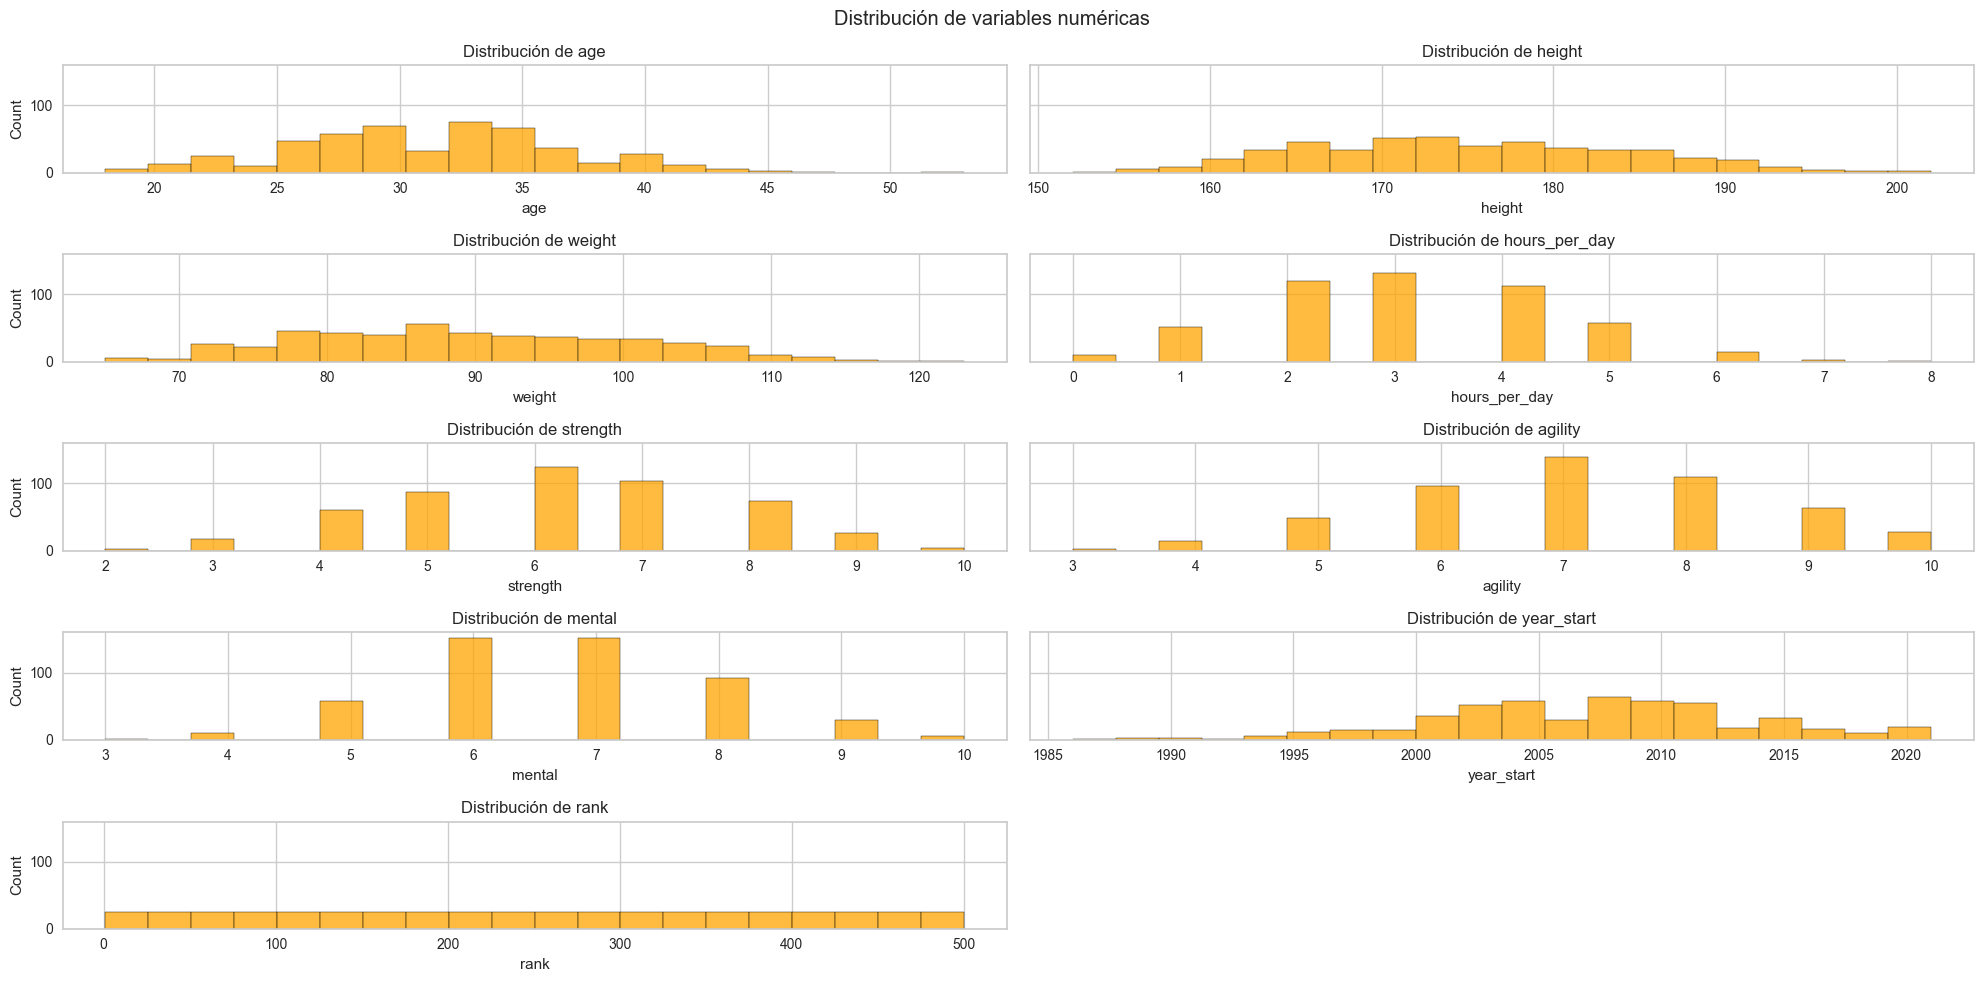

In [5]:
visualizar.plot_numericas(color="orange")

# Sobre la gráfica
- Los atletas están entre 25 y 35 años
- La altura está entre 160 y 190
- El peso está entre 70 y 110
- hours_per_day: es categórica
- fuerza es categórica
- agilidad es categórica
- mental es categorica
- year_start esta entre 2000 y 2015
- Rank son todo valores únicos

In [6]:
df["federation"].value_counts()

federation
Fight Zone Wrestling             206
Consejo Global de Lucha Libre    192
World Wrestling Entertainment    102
Name: count, dtype: int64

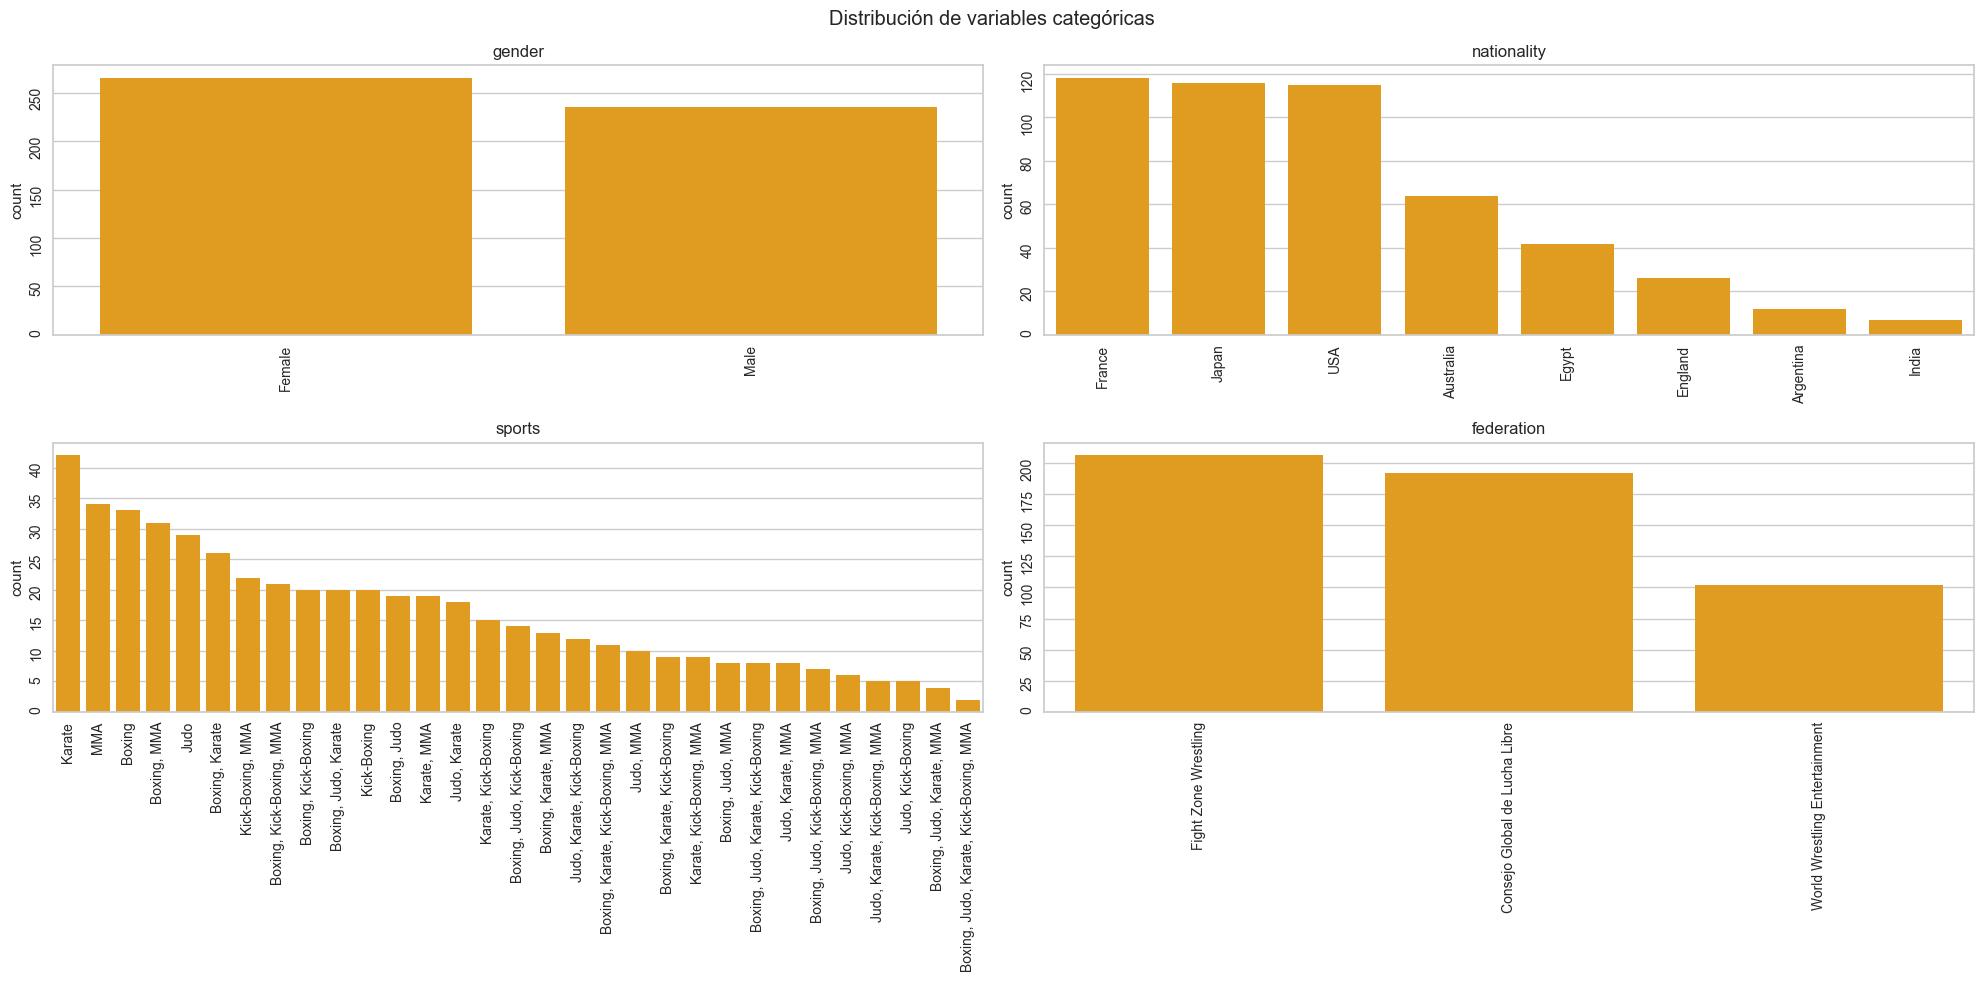

In [7]:
visualizar.plot_categoricas(color="orange")

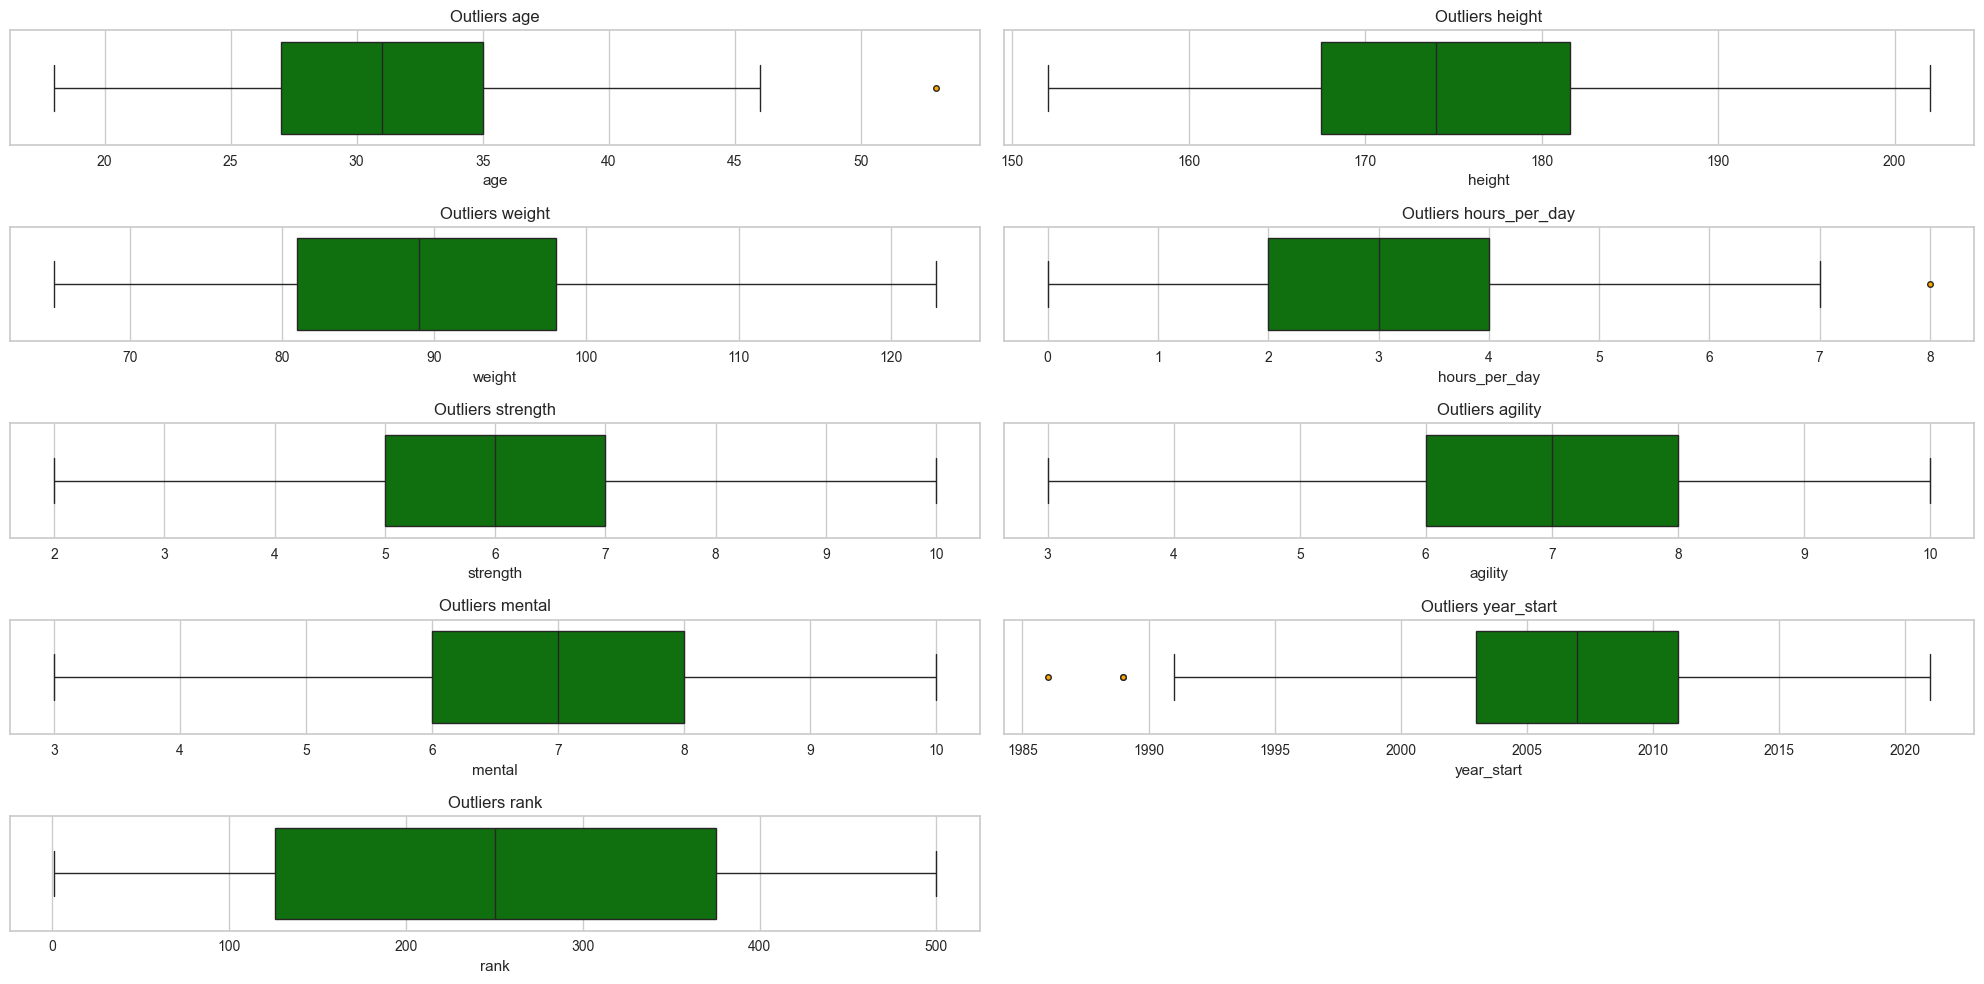

In [8]:
visualizar.deteccion_outliers(color="green")

# Sobre la gráfica
- No hay muchos outliers, lo que nos facilita bastante la obtención de buenos resultados

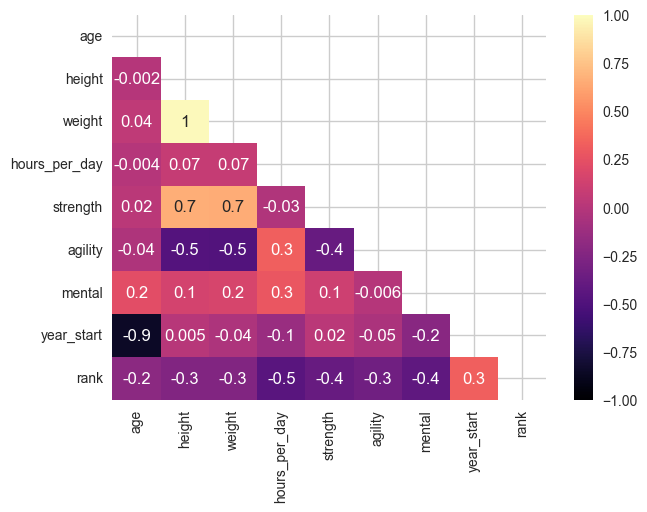

In [9]:
visualizar.correlacion()

# Sobre la gráfica
- Correlación de 1 entre height y weight
- Correlación de -0.9 con year_start y age
- Correlacion de 0.7 entre strength y height
- Correlacion de 0.7 entre weight y height
- Correlación de -0.5 entre hours_per_day y rank, donde si hacen más horas bajan en rank pero bajar en rank es bueno porque buscas ser el 1
- a rank le afecta, mental, strength con -0.4 el resto con -0.3 y -0.2
- el año le afecta a rank tambien

En resumen las correlaciones son correctas y tienen sentido

# Eliminar rank, federation y nationality

In [10]:
df.drop(columns=["rank","federation","nationality"],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Aaron Peavy to Zenaida Flagge
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         500 non-null    object 
 1   age            500 non-null    int64  
 2   height         500 non-null    float64
 3   weight         500 non-null    int64  
 4   sports         500 non-null    object 
 5   hours_per_day  500 non-null    int64  
 6   strength       500 non-null    int64  
 7   agility        500 non-null    int64  
 8   mental         500 non-null    int64  
 9   year_start     500 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 59.1+ KB


# Pasar a categóricas
Son las siguientes:
- gender
- nationality
- sports
- hours_per_day
- strength
- agility
- mental
- federation

In [12]:
cols = ["gender","sports","hours_per_day","strength","agility","mental"]
for col in cols:
    df[col] = df[col].astype("category")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Aaron Peavy to Zenaida Flagge
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         500 non-null    category
 1   age            500 non-null    int64   
 2   height         500 non-null    float64 
 3   weight         500 non-null    int64   
 4   sports         500 non-null    category
 5   hours_per_day  500 non-null    category
 6   strength       500 non-null    category
 7   agility        500 non-null    category
 8   mental         500 non-null    category
 9   year_start     500 non-null    int64   
dtypes: category(6), float64(1), int64(3)
memory usage: 41.5+ KB


# Encodear categóricas en Frequency

In [14]:
dictio_encoding = {
    "onehot" : ["gender"],
    "frequency" : ["sports","hours_per_day","strength","agility","mental"]
}

# Frequency Encoding

In [15]:
encodear = sc.Preprocesado(df,dictio_encoding, "../../datos/encoders/")
df_encoded = encodear.encoding_categoricas_frequency()

# One Hot Encoder

In [16]:
encodear = sc.Preprocesado(df_encoded,dictio_encoding, "../../datos/encoders/")
df_encoded = encodear.one_hot_encoding(drop_index = False)


# Estandarizamos 

In [17]:
df_encoded.sample()

,name,age,height,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male
457,Terese Resnick,33,161.0,71,0.038,0.24,0.122,0.218,0.304,2006,1.0,0.0


In [18]:
cols_escalar = ['age', 'height', 'weight', 'sports',
                'hours_per_day', 'strength', 'agility', 'mental', 'year_start']

escalador_minmax = MinMaxScaler()
datos_transf_minmax = escalador_minmax.fit_transform(df[cols_escalar])
df_escalado = pd.DataFrame(datos_transf_minmax, columns=cols_escalar)
df_encoded.drop(columns=cols_escalar, inplace=True)
df = pd.concat([df_escalado, df_encoded.reset_index(drop=True)], axis=1)


In [19]:
df.set_index("name",inplace=True)

In [20]:
df

,age,height,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male
name,,,,,,,,,,,
Aaron Peavy,0.657143,0.26,0.293103,0.725,1.000000,0.826446,0.781022,1.000000,0.085714,1.0,0.0
Abe Rutland,0.514286,0.66,0.603448,0.675,0.068702,0.586777,0.335766,0.185430,0.571429,0.0,1.0
Adrian Quinn,0.314286,0.53,0.482759,1.000,0.847328,0.586777,0.781022,1.000000,0.742857,0.0,1.0
Alan Beckham,0.600000,0.71,0.724138,0.675,1.000000,0.826446,0.686131,0.602649,0.485714,0.0,1.0
Albertha Rodriguez,0.314286,0.12,0.120690,0.800,0.381679,0.694215,1.000000,1.000000,0.742857,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Willie Durham,0.457143,0.67,0.672414,0.675,0.908397,0.198347,0.686131,0.377483,0.628571,0.0,1.0
Winnie Larsen,0.371429,0.19,0.103448,0.075,0.427481,0.479339,0.445255,1.000000,0.485714,1.0,0.0
Winston Wahl,0.114286,0.73,0.637931,0.450,1.000000,0.586777,0.781022,1.000000,1.000000,0.0,1.0


# Aplicamos KMeans

### Sacamos Elbow para saber mejor K

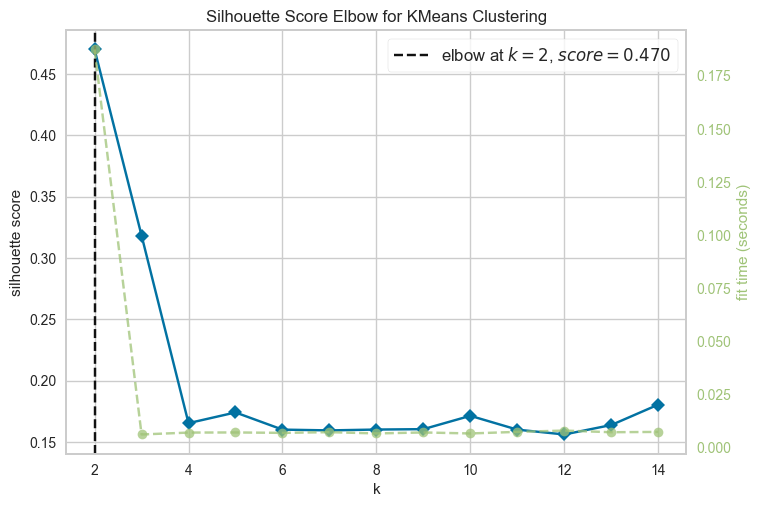

In [21]:
kmeans = sc.Clustering(df)
kmeans.sacar_clusters_kmeans()

### Sacamos el Kmeans con la K obtenida

In [22]:
df, labels = kmeans.modelo_kmeans(df,2)
kmeans = sc.Clustering(df)
kmeans.calcular_metricas(labels)

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.539979,0.745325,265
1,0.539979,0.745325,235


### Sobre métricas:
- 

# Graficar lo obtenido

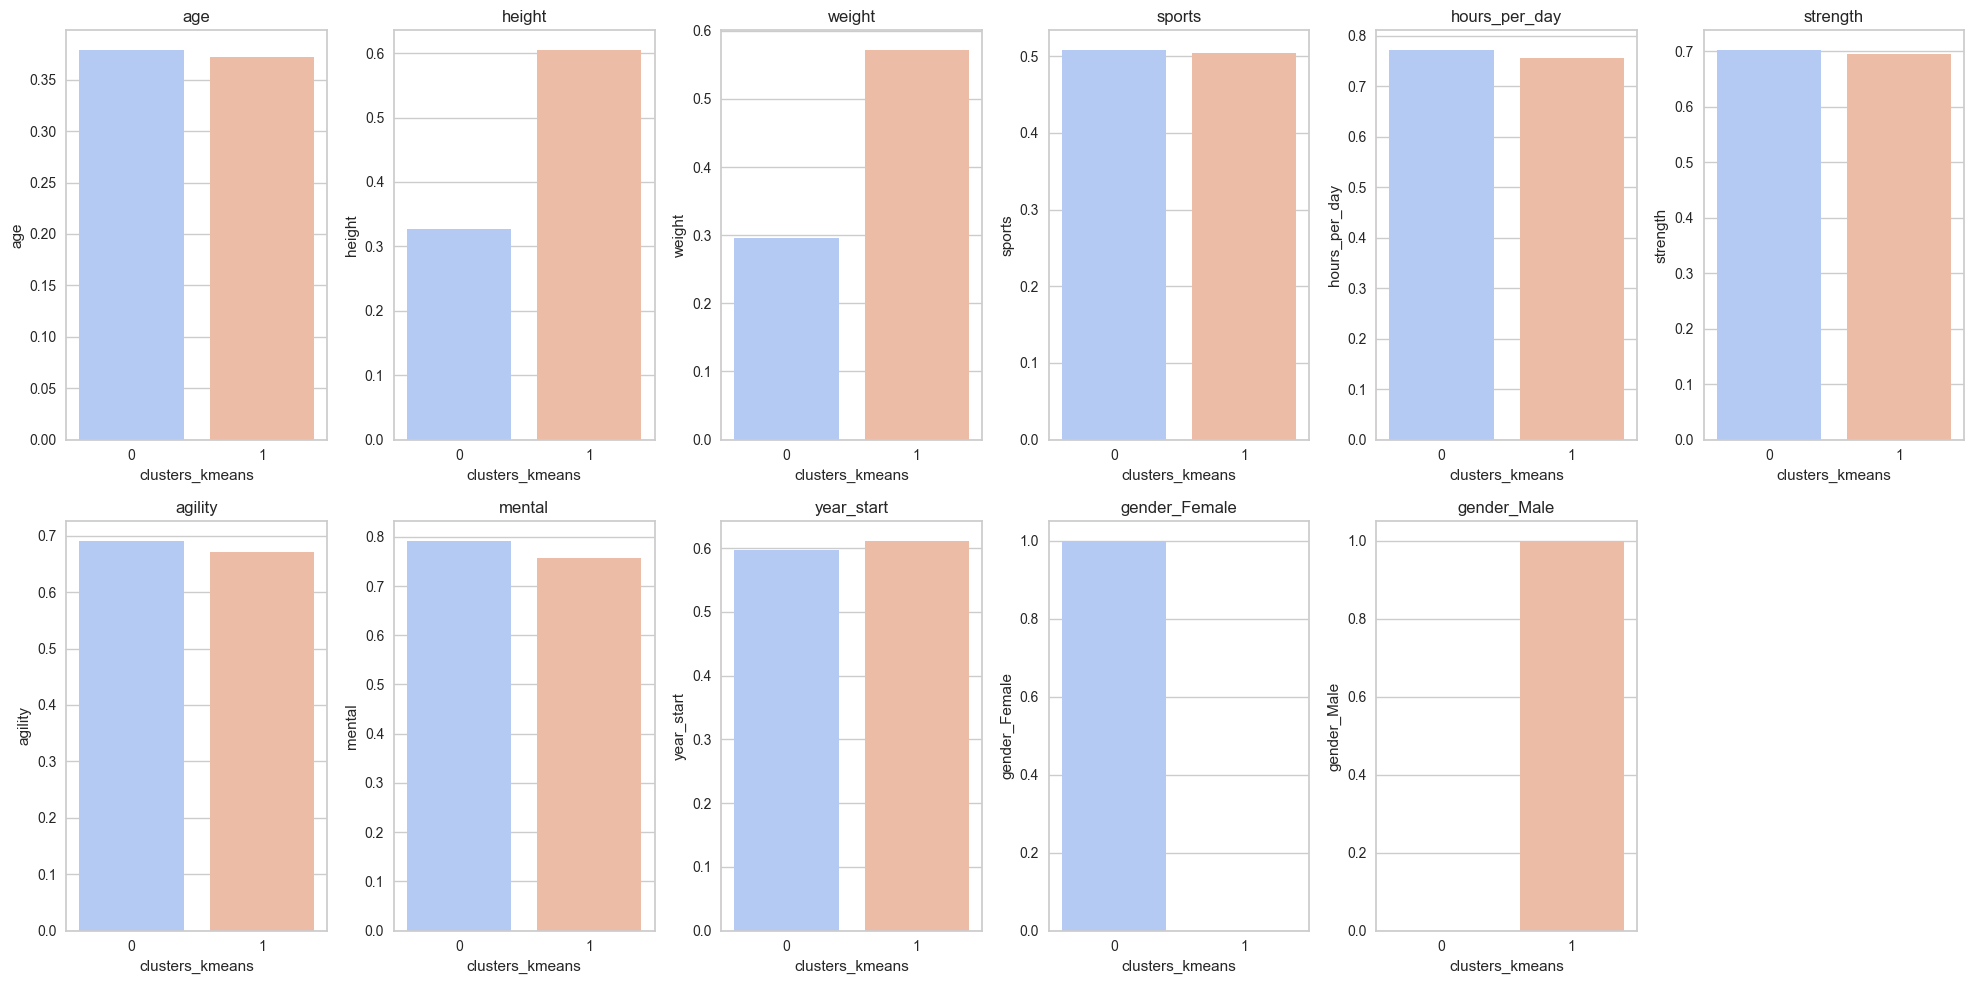

In [23]:
columnas_plot = df.columns.drop("clusters_kmeans")

fig, axes = plt.subplots(nrows=2,ncols=math.ceil(len(columnas_plot)/2),figsize = (20,10))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df.groupby("clusters_kmeans")[columna].mean().reset_index()
    sns.barplot(x="clusters_kmeans", y = columna, data = df_group,ax=axes[indice],palette="coolwarm")
    axes[indice].set_title(columna)
plt.tight_layout()
fig.delaxes(axes[-1])

# Conclusiones
- Hemos obtenido muchos grupos muy parejos
- Los ha agrupado por género

In [24]:
df

,age,height,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male,clusters_kmeans
name,,,,,,,,,,,,
Aaron Peavy,0.657143,0.26,0.293103,0.725,1.000000,0.826446,0.781022,1.000000,0.085714,1.0,0.0,0
Abe Rutland,0.514286,0.66,0.603448,0.675,0.068702,0.586777,0.335766,0.185430,0.571429,0.0,1.0,1
Adrian Quinn,0.314286,0.53,0.482759,1.000,0.847328,0.586777,0.781022,1.000000,0.742857,0.0,1.0,1
Alan Beckham,0.600000,0.71,0.724138,0.675,1.000000,0.826446,0.686131,0.602649,0.485714,0.0,1.0,1
Albertha Rodriguez,0.314286,0.12,0.120690,0.800,0.381679,0.694215,1.000000,1.000000,0.742857,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Willie Durham,0.457143,0.67,0.672414,0.675,0.908397,0.198347,0.686131,0.377483,0.628571,0.0,1.0,1
Winnie Larsen,0.371429,0.19,0.103448,0.075,0.427481,0.479339,0.445255,1.000000,0.485714,1.0,0.0,0
Winston Wahl,0.114286,0.73,0.637931,0.450,1.000000,0.586777,0.781022,1.000000,1.000000,0.0,1.0,1


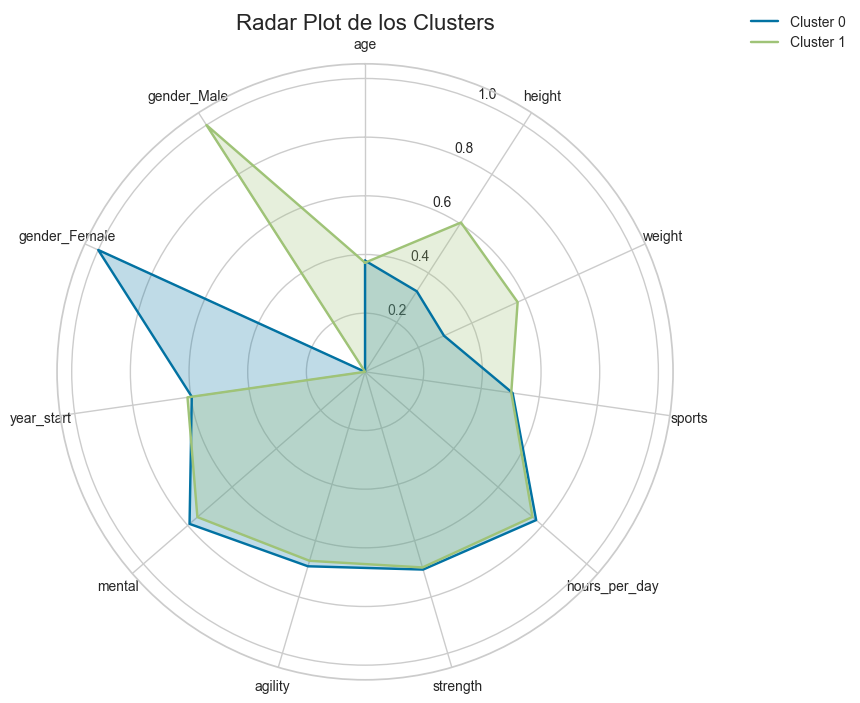

<Figure size 800x550 with 0 Axes>

In [25]:
# visualizamos los dendrogramas para saber que método de distancia es el mejor para nuestros datos
modelos = sc.Clustering(df)
modelos.radar_plot("clusters_kmeans")

# Sobre la gráfica
- Los cluster nos separan en hombres y mujeres
- Están balanceados
- En Weight y height están un tanto desbalanceados (no son iguales)

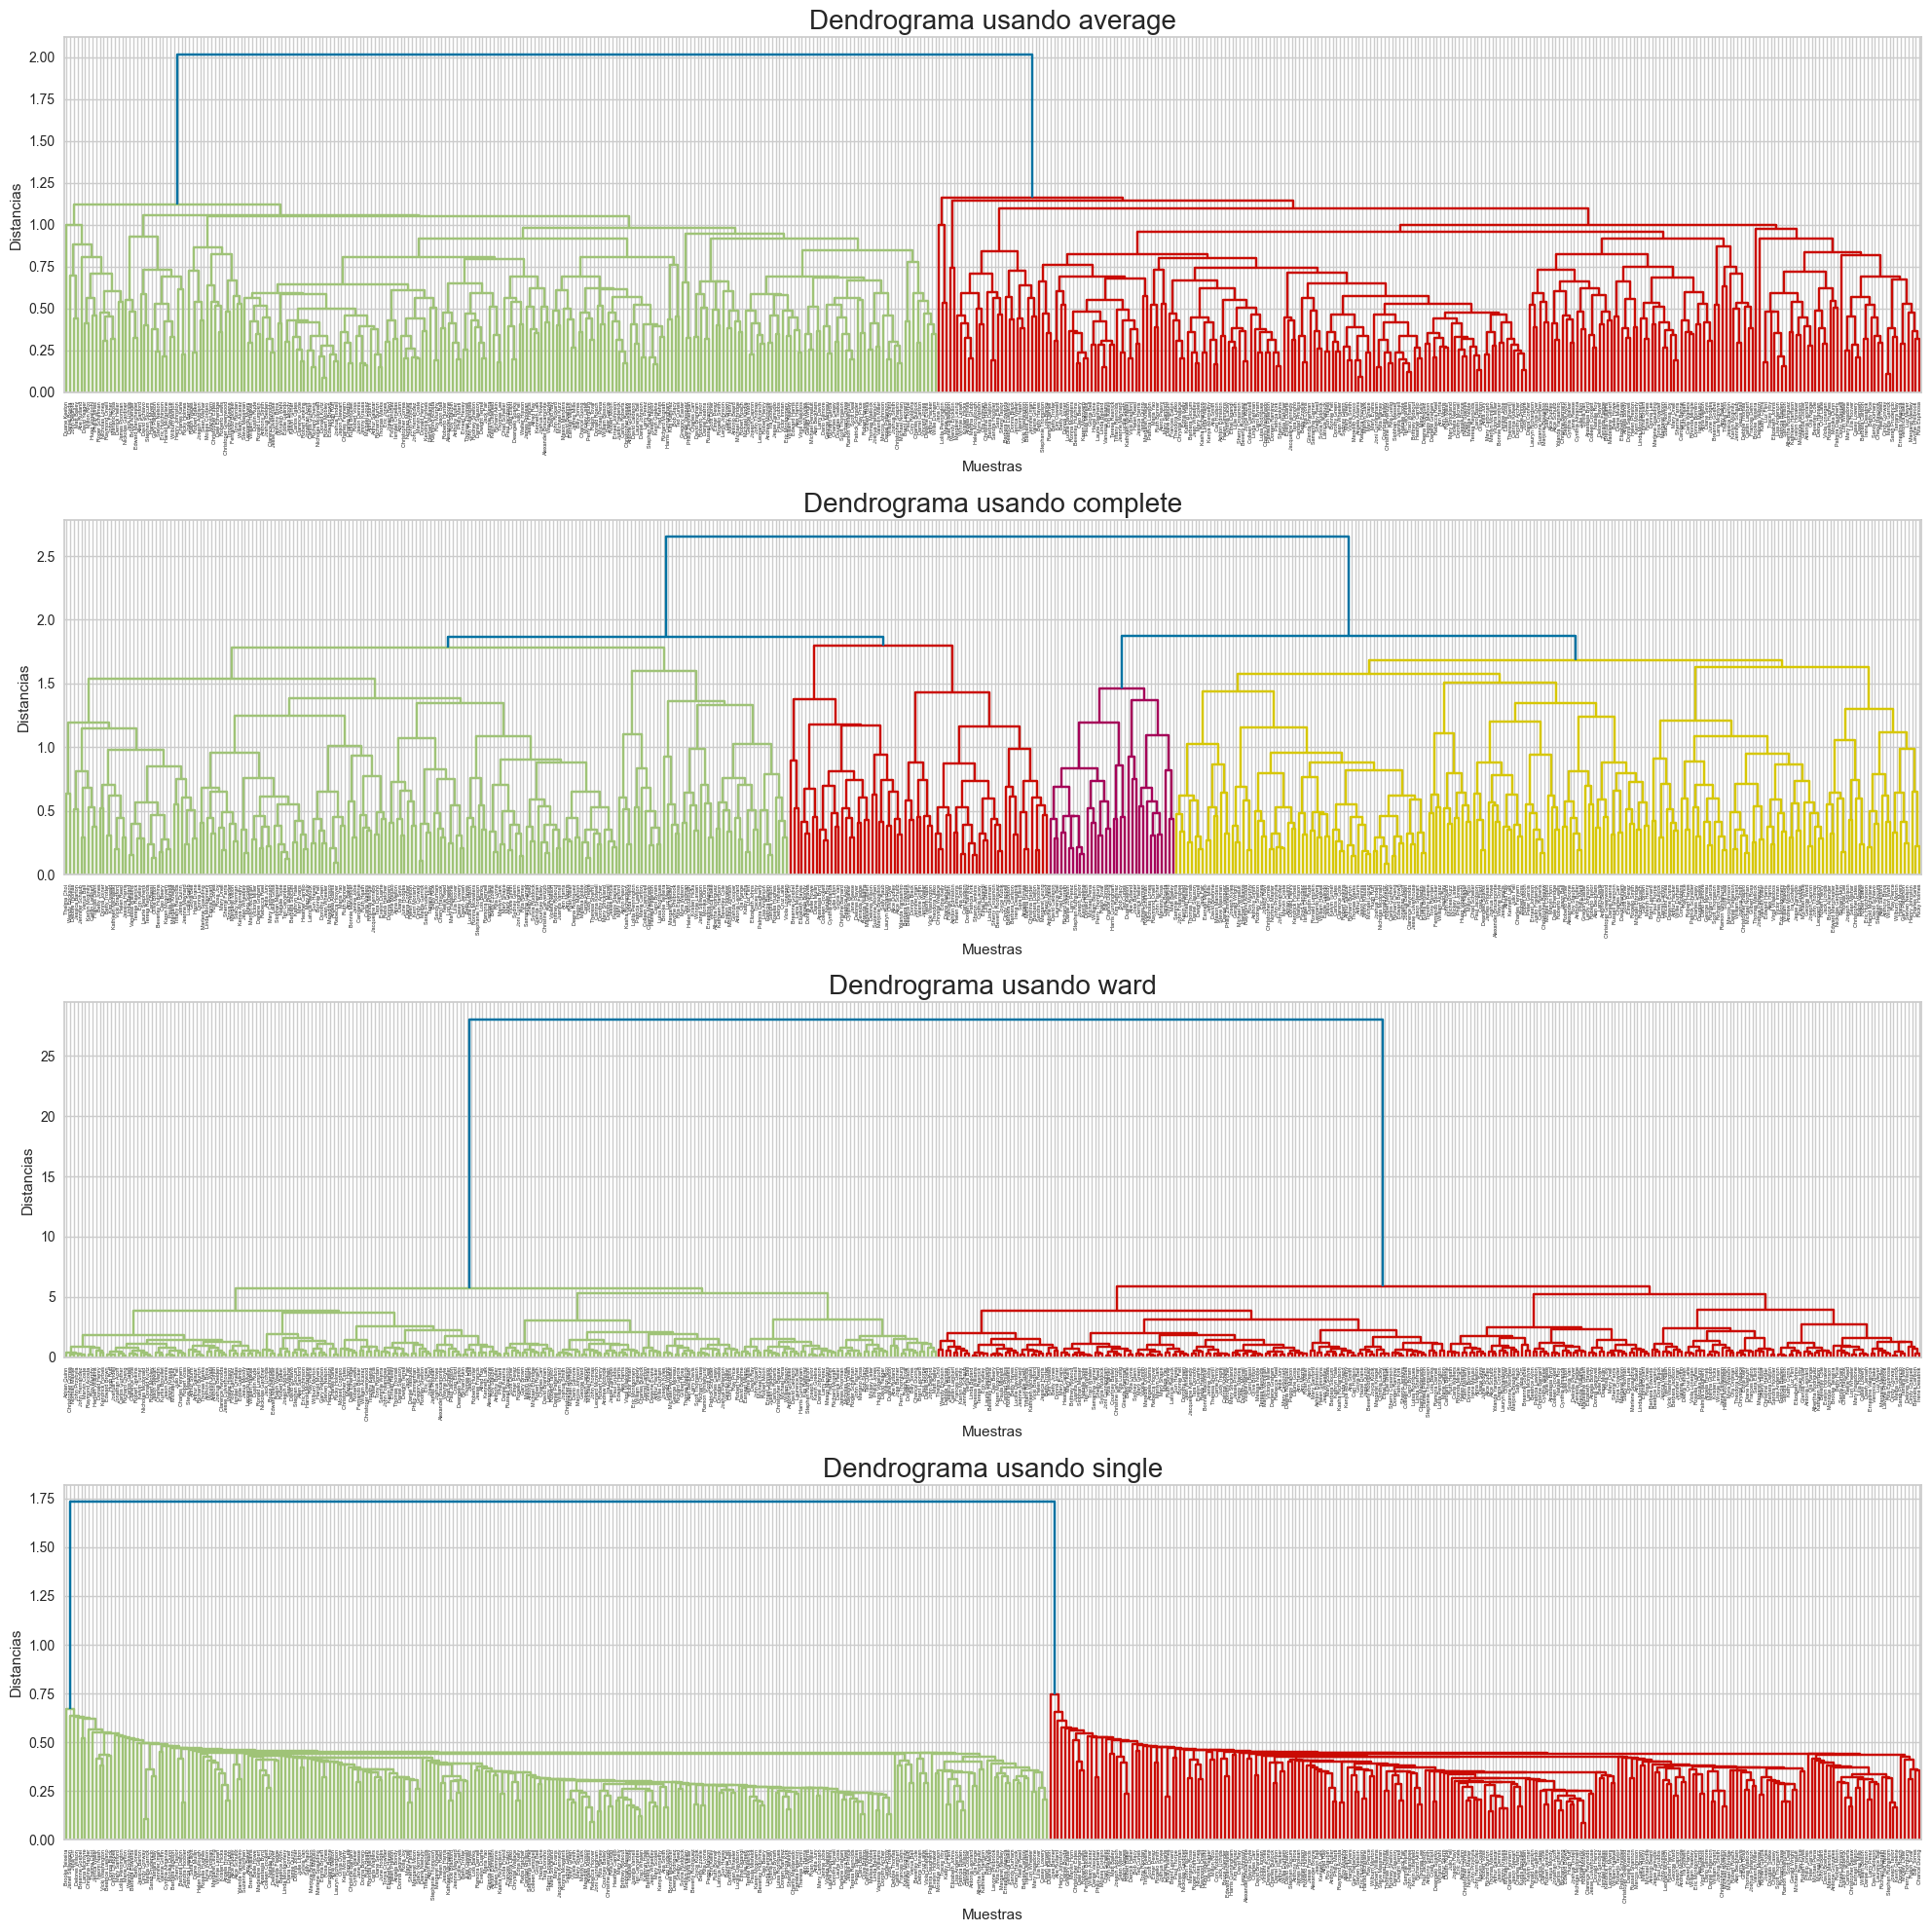

In [26]:
# visualizamos los dendrogramas para saber que método de distancia es el mejor para nuestros datos
modelos = sc.Clustering(df)
modelos.visualizar_dendrogramas(grafica_size=(20,20),titulo_size=20)

# Sobre la Gráfica 
- average: Los agrupa en 2
- complete: Los agrupa en 4 
- ward: agrupa en 2
- single: agrupa en 2

In [27]:
df.drop(columns="clusters_kmeans",inplace=True)

In [28]:
modelito = sc.Clustering(df)
df_results = modelito.multiples_modelos_aglomerativo(num_clusters=6,orden="silhouette_score",print_errors=False)
df_results.head(10)

,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
6,single,cosine,0.715104,0.901754,"{0: 235, 1: 265}",2
24,complete,cosine,0.715104,0.901754,"{0: 265, 1: 235}",2
42,average,cosine,0.715104,0.901754,"{0: 265, 1: 235}",2
43,average,cosine,0.570232,0.796067,"{0: 235, 1: 264, 2: 1}",3
7,single,cosine,0.567026,0.812268,"{0: 265, 1: 234, 2: 1}",3
18,complete,euclidean,0.470030,0.901754,"{0: 235, 1: 265}",2
0,single,euclidean,0.470030,0.901754,"{0: 235, 1: 265}",2
36,average,euclidean,0.470030,0.901754,"{0: 265, 1: 235}",2
54,ward,euclidean,0.470030,0.901754,"{0: 265, 1: 235}",2
25,complete,cosine,0.430891,2.197771,"{0: 235, 1: 159, 2: 106}",3


### Vamos a probar 5 modelos
- single 2 clusters cosine
- complete 2 clusters cosine
- average 2 clusters cosine
- average 3 clusters cosine
- single 3 clusters cosine

# Single 2 Clusters Cosine

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.539979,0.745325,235
1,0.539979,0.745325,265


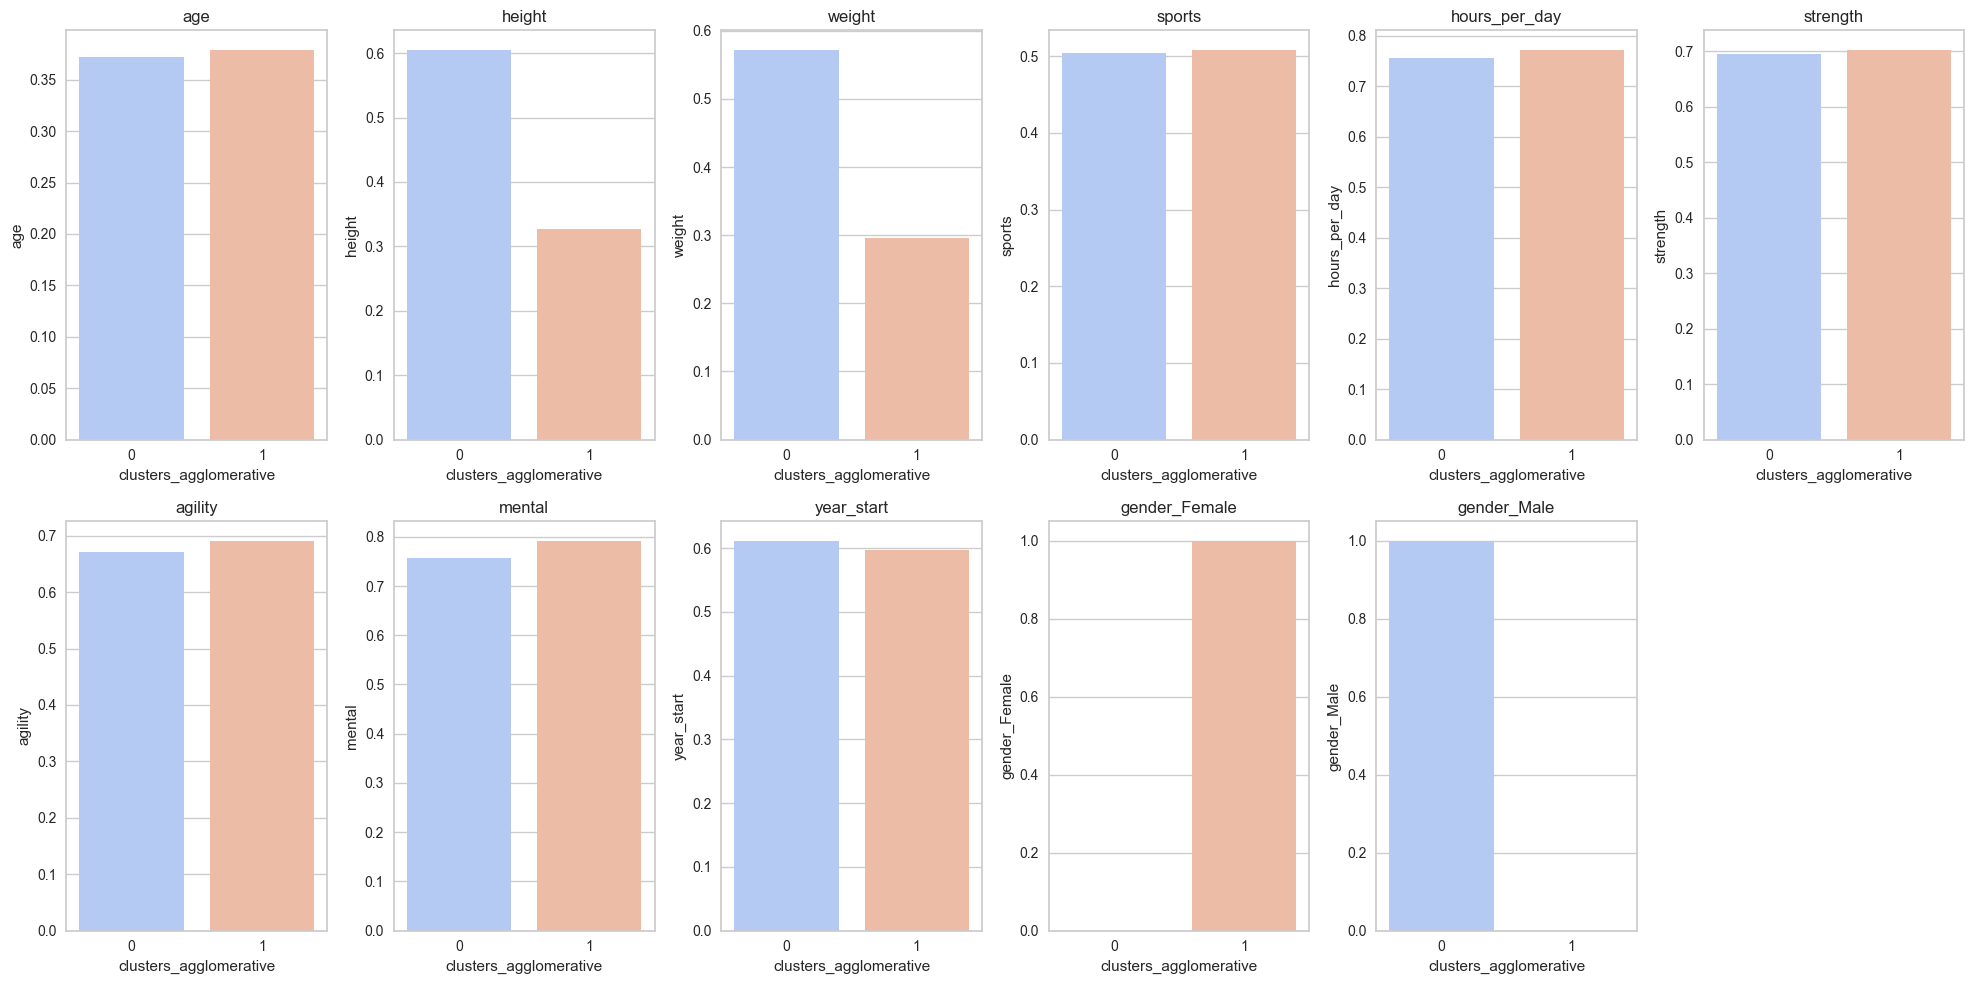

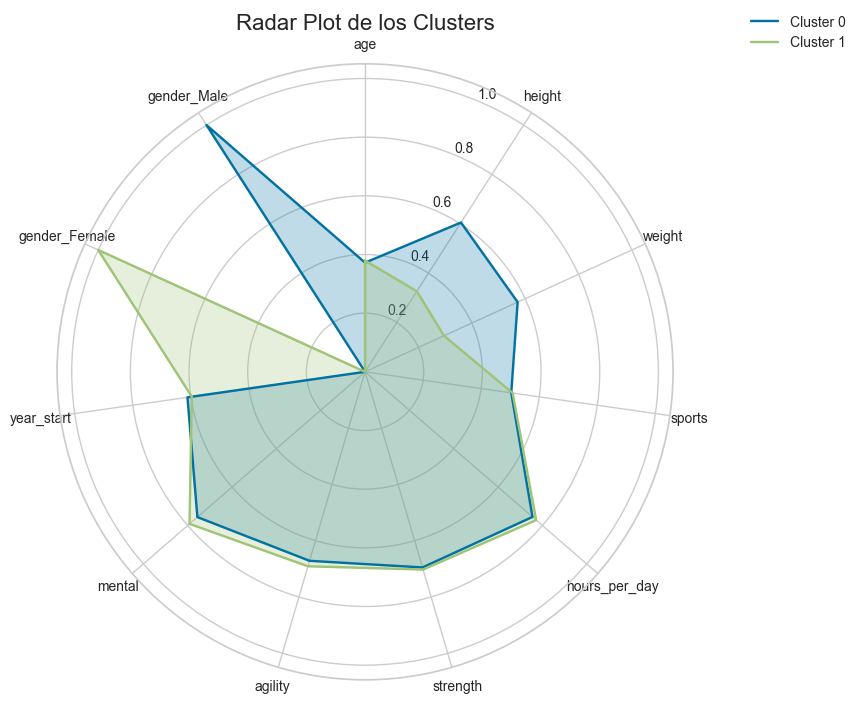

,age,height,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male,clusters_agglomerative
name,,,,,,,,,,,,
Aaron Peavy,0.657143,0.26,0.293103,0.725,1.000000,0.826446,0.781022,1.000000,0.085714,1.0,0.0,1
Abe Rutland,0.514286,0.66,0.603448,0.675,0.068702,0.586777,0.335766,0.185430,0.571429,0.0,1.0,0
Adrian Quinn,0.314286,0.53,0.482759,1.000,0.847328,0.586777,0.781022,1.000000,0.742857,0.0,1.0,0
Alan Beckham,0.600000,0.71,0.724138,0.675,1.000000,0.826446,0.686131,0.602649,0.485714,0.0,1.0,0
Albertha Rodriguez,0.314286,0.12,0.120690,0.800,0.381679,0.694215,1.000000,1.000000,0.742857,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Willie Durham,0.457143,0.67,0.672414,0.675,0.908397,0.198347,0.686131,0.377483,0.628571,0.0,1.0,0
Winnie Larsen,0.371429,0.19,0.103448,0.075,0.427481,0.479339,0.445255,1.000000,0.485714,1.0,0.0,1
Winston Wahl,0.114286,0.73,0.637931,0.450,1.000000,0.586777,0.781022,1.000000,1.000000,0.0,1.0,0


<Figure size 800x550 with 0 Axes>

In [29]:
modelo_aglo = sc.Clustering(df)
modelo_aglo.modelo_aglomerativo(2,"single","cosine",dataframe_original=df,metricas=True,graficas=True)

# Complete 2 Clusters Cosine

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.539979,0.745325,235
1,0.539979,0.745325,265


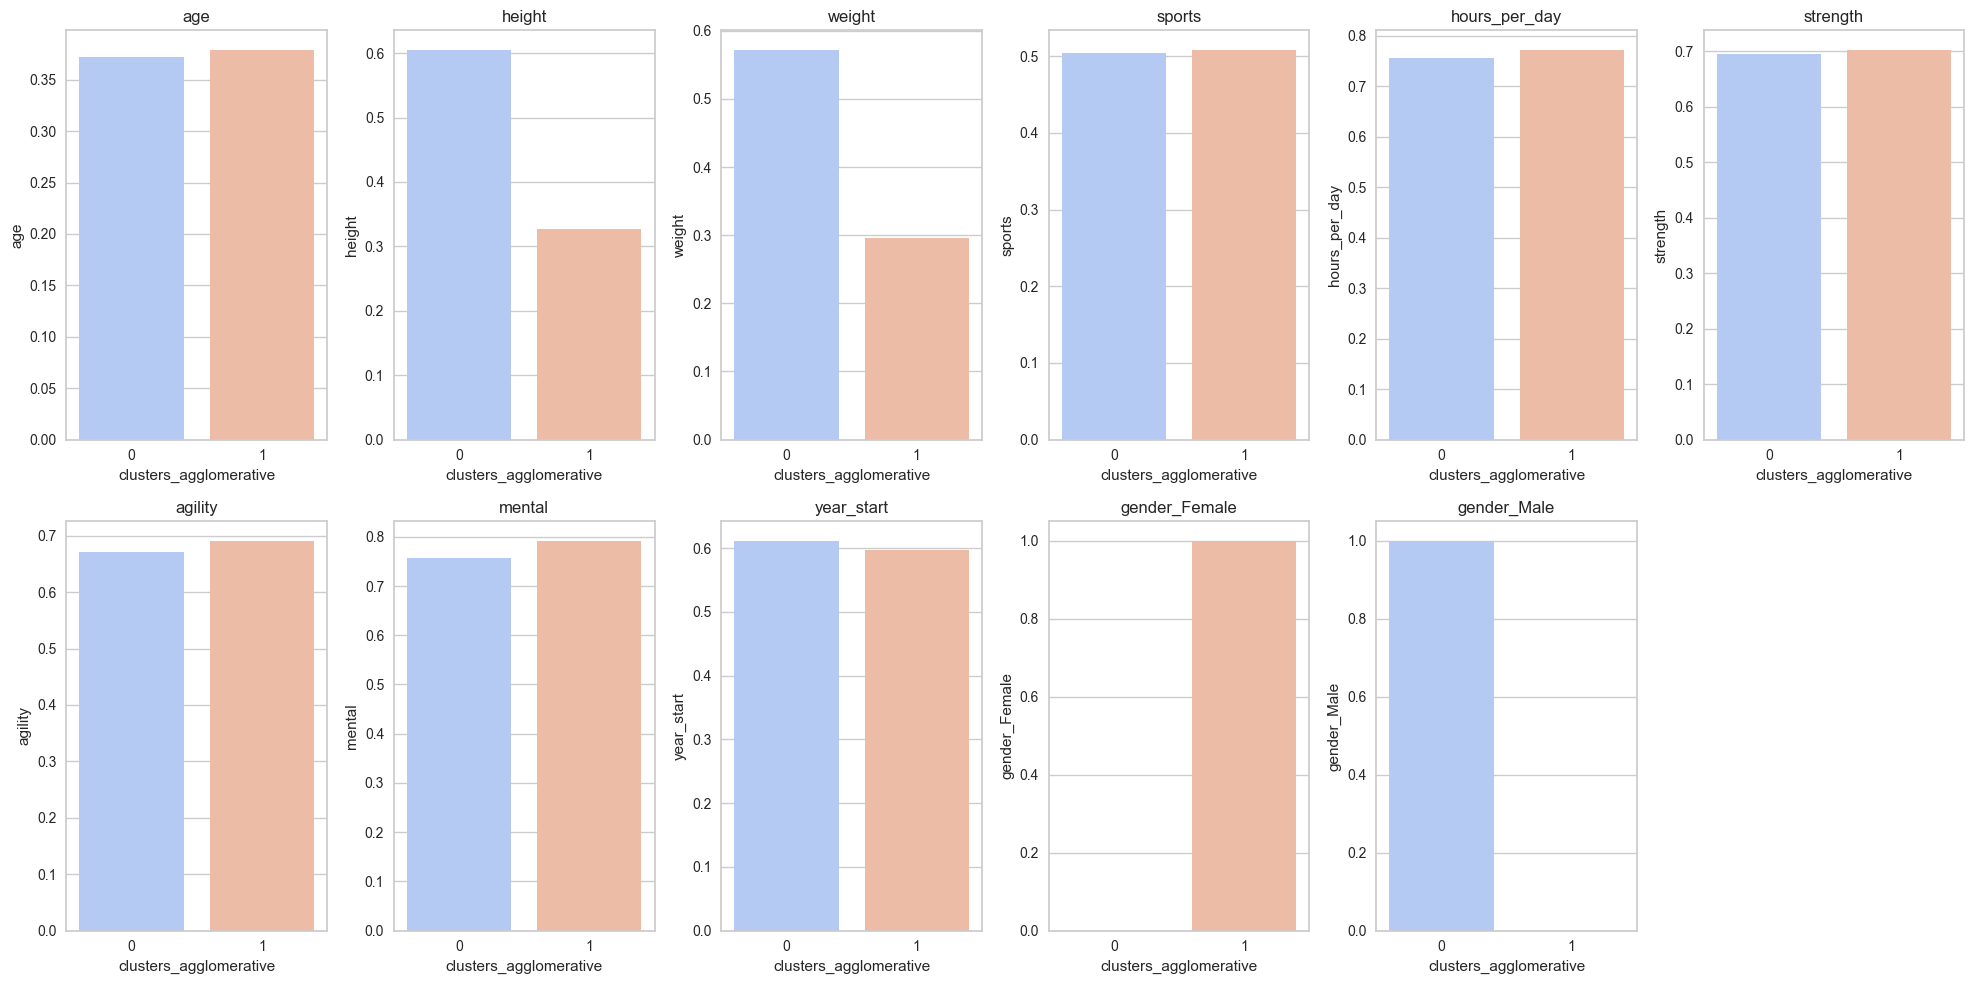

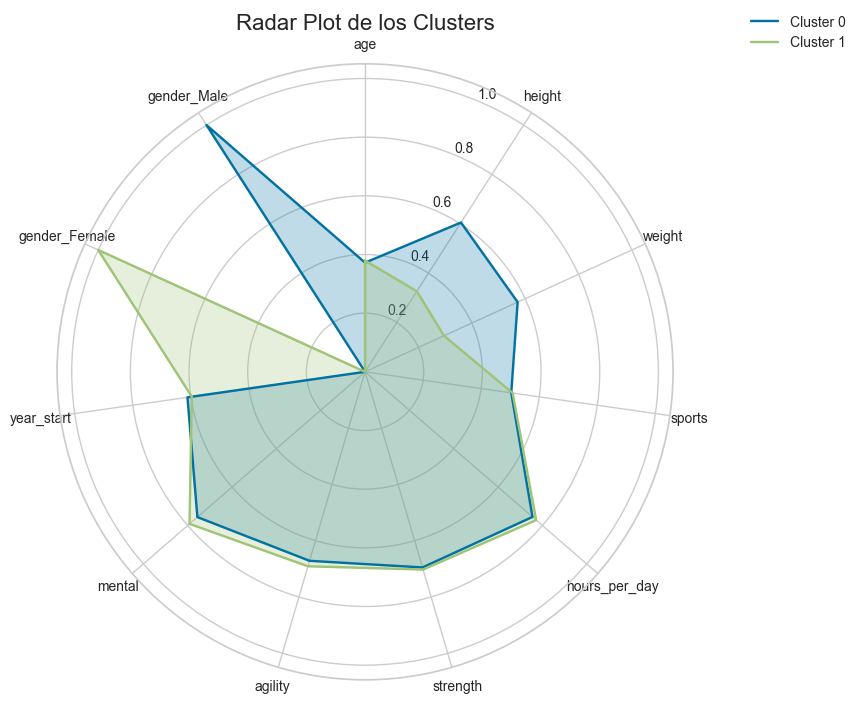

,age,height,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male,clusters_agglomerative
name,,,,,,,,,,,,
Aaron Peavy,0.657143,0.26,0.293103,0.725,1.000000,0.826446,0.781022,1.000000,0.085714,1.0,0.0,1
Abe Rutland,0.514286,0.66,0.603448,0.675,0.068702,0.586777,0.335766,0.185430,0.571429,0.0,1.0,0
Adrian Quinn,0.314286,0.53,0.482759,1.000,0.847328,0.586777,0.781022,1.000000,0.742857,0.0,1.0,0
Alan Beckham,0.600000,0.71,0.724138,0.675,1.000000,0.826446,0.686131,0.602649,0.485714,0.0,1.0,0
Albertha Rodriguez,0.314286,0.12,0.120690,0.800,0.381679,0.694215,1.000000,1.000000,0.742857,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Willie Durham,0.457143,0.67,0.672414,0.675,0.908397,0.198347,0.686131,0.377483,0.628571,0.0,1.0,0
Winnie Larsen,0.371429,0.19,0.103448,0.075,0.427481,0.479339,0.445255,1.000000,0.485714,1.0,0.0,1
Winston Wahl,0.114286,0.73,0.637931,0.450,1.000000,0.586777,0.781022,1.000000,1.000000,0.0,1.0,0


<Figure size 800x550 with 0 Axes>

In [30]:
modelo_aglo = sc.Clustering(df)
modelo_aglo.modelo_aglomerativo(2,"complete","cosine",dataframe_original=df,metricas=True,graficas=True)

# Average 2 Clusters Cosine

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.539979,0.745325,235
1,0.539979,0.745325,265


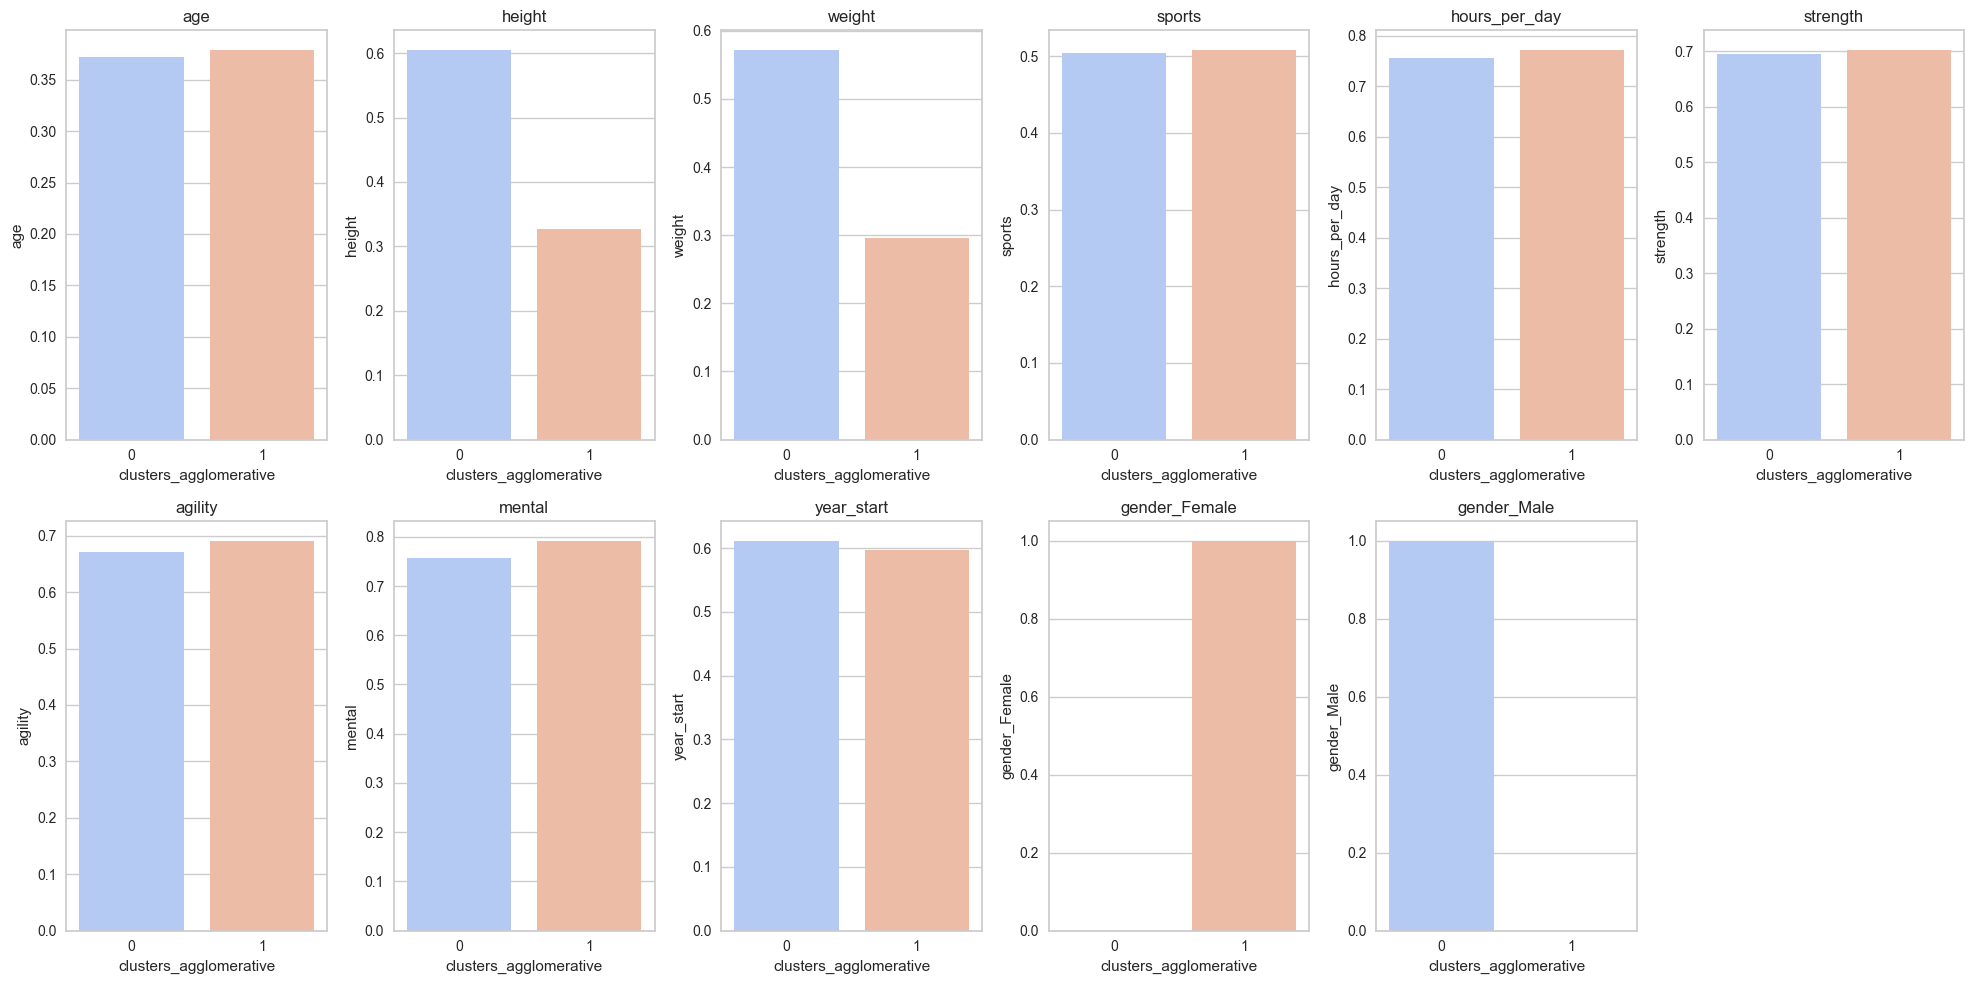

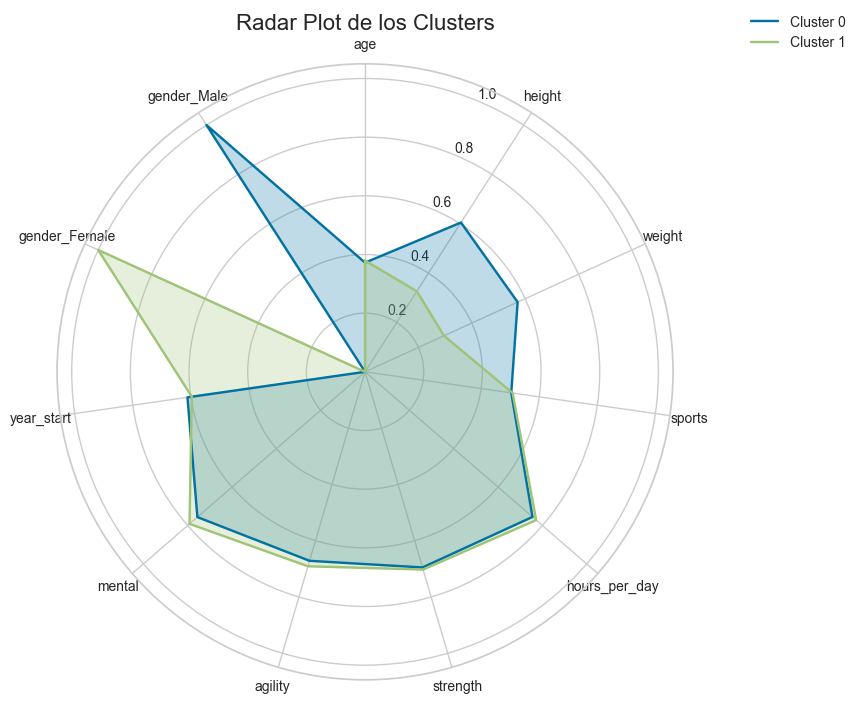

,age,height,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male,clusters_agglomerative
name,,,,,,,,,,,,
Aaron Peavy,0.657143,0.26,0.293103,0.725,1.000000,0.826446,0.781022,1.000000,0.085714,1.0,0.0,1
Abe Rutland,0.514286,0.66,0.603448,0.675,0.068702,0.586777,0.335766,0.185430,0.571429,0.0,1.0,0
Adrian Quinn,0.314286,0.53,0.482759,1.000,0.847328,0.586777,0.781022,1.000000,0.742857,0.0,1.0,0
Alan Beckham,0.600000,0.71,0.724138,0.675,1.000000,0.826446,0.686131,0.602649,0.485714,0.0,1.0,0
Albertha Rodriguez,0.314286,0.12,0.120690,0.800,0.381679,0.694215,1.000000,1.000000,0.742857,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Willie Durham,0.457143,0.67,0.672414,0.675,0.908397,0.198347,0.686131,0.377483,0.628571,0.0,1.0,0
Winnie Larsen,0.371429,0.19,0.103448,0.075,0.427481,0.479339,0.445255,1.000000,0.485714,1.0,0.0,1
Winston Wahl,0.114286,0.73,0.637931,0.450,1.000000,0.586777,0.781022,1.000000,1.000000,0.0,1.0,0


<Figure size 800x550 with 0 Axes>

In [31]:
modelo_aglo = sc.Clustering(df)
modelo_aglo.modelo_aglomerativo(2,"average","cosine",dataframe_original=df,metricas=True,graficas=True)

# Average 3 Clusters Cosine

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.479103,0.649941,265
1,0.479103,0.649941,234
2,0.479103,0.649941,1


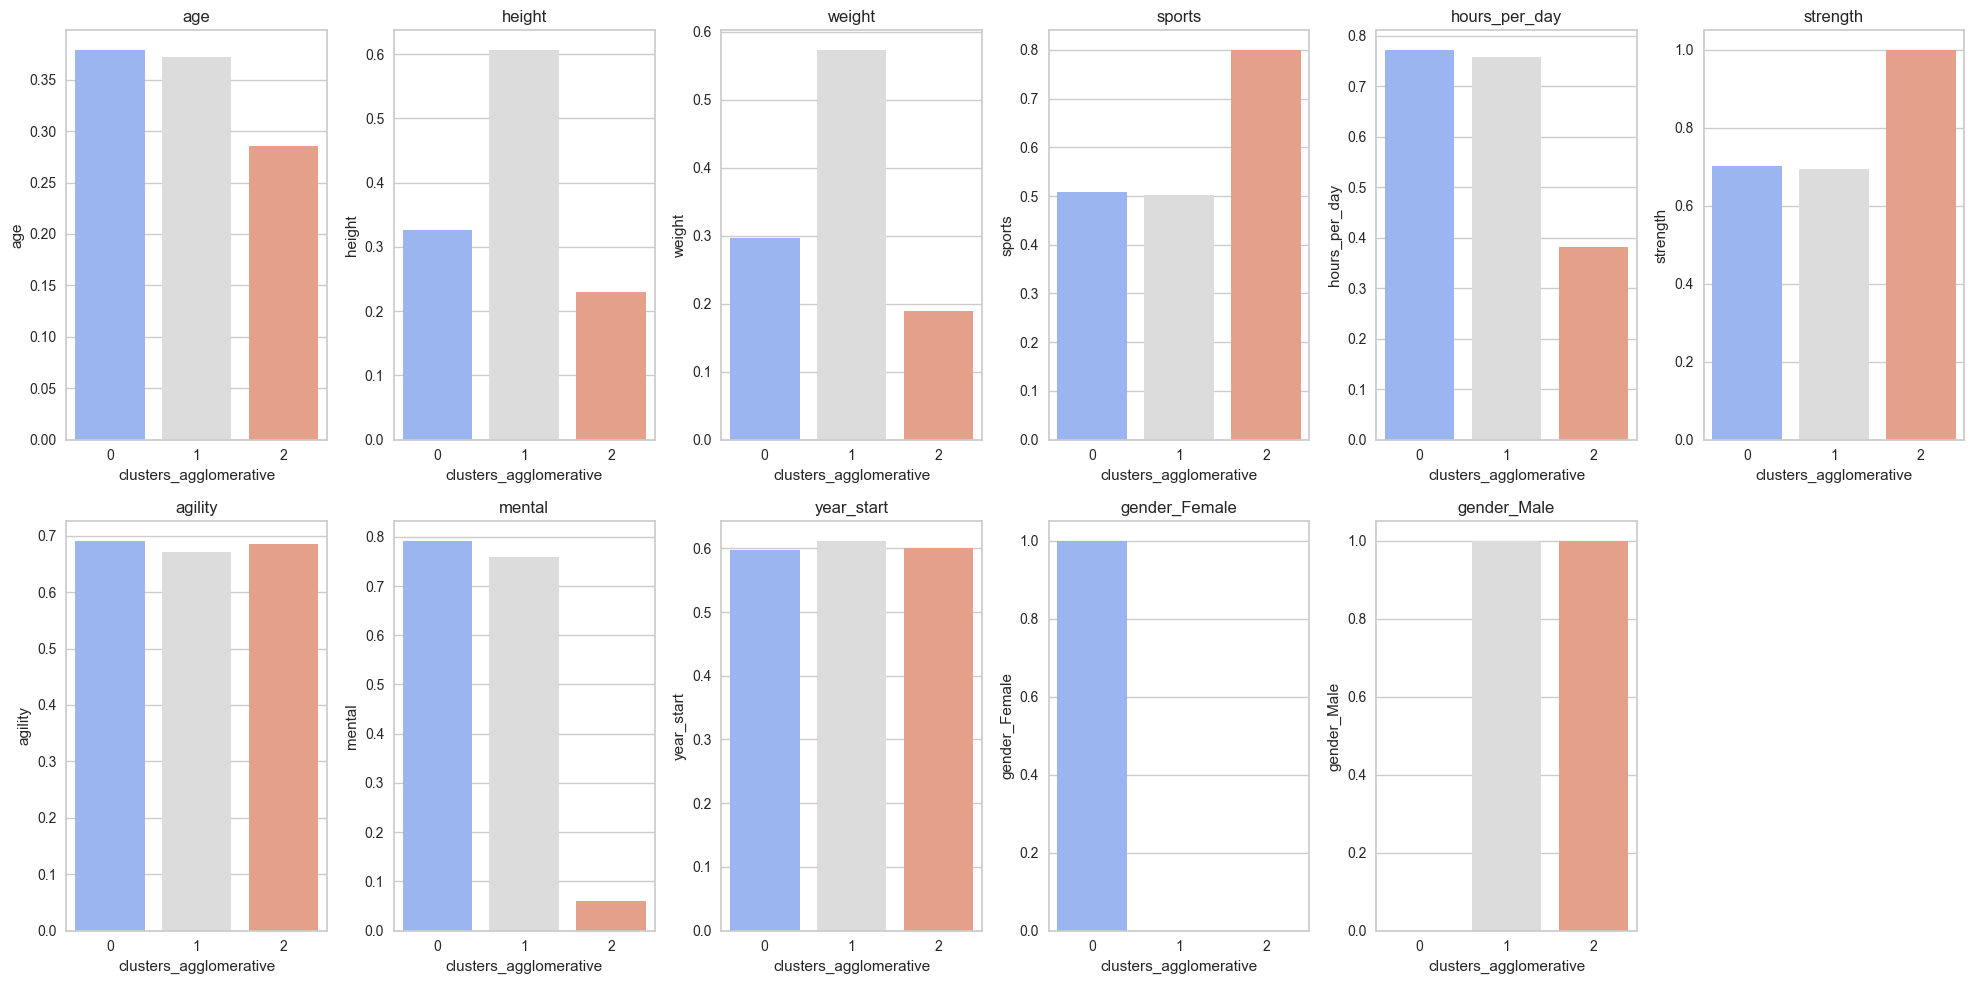

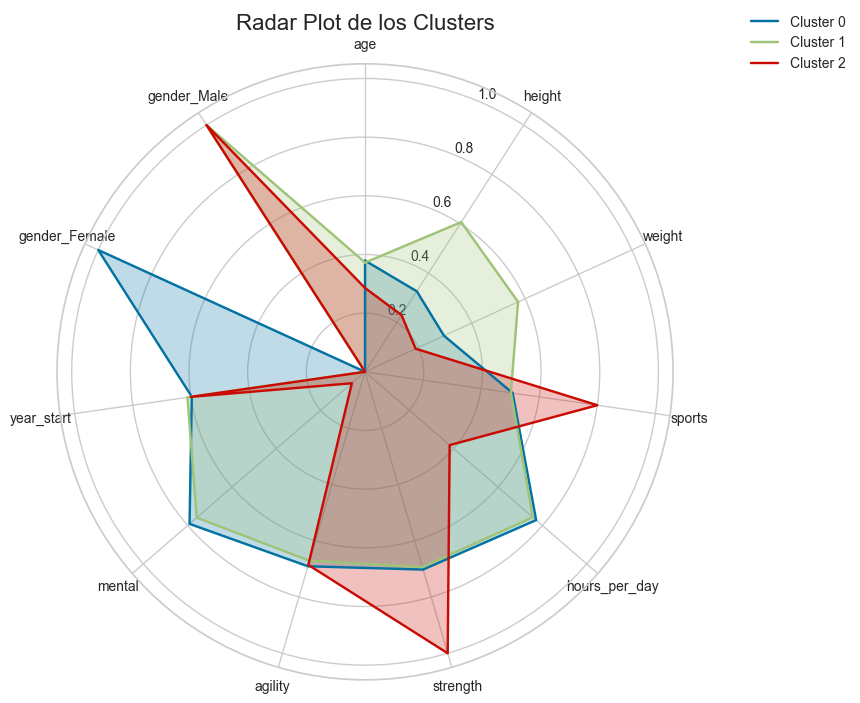

,age,height,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male,clusters_agglomerative
name,,,,,,,,,,,,
Aaron Peavy,0.657143,0.26,0.293103,0.725,1.000000,0.826446,0.781022,1.000000,0.085714,1.0,0.0,0
Abe Rutland,0.514286,0.66,0.603448,0.675,0.068702,0.586777,0.335766,0.185430,0.571429,0.0,1.0,1
Adrian Quinn,0.314286,0.53,0.482759,1.000,0.847328,0.586777,0.781022,1.000000,0.742857,0.0,1.0,1
Alan Beckham,0.600000,0.71,0.724138,0.675,1.000000,0.826446,0.686131,0.602649,0.485714,0.0,1.0,1
Albertha Rodriguez,0.314286,0.12,0.120690,0.800,0.381679,0.694215,1.000000,1.000000,0.742857,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Willie Durham,0.457143,0.67,0.672414,0.675,0.908397,0.198347,0.686131,0.377483,0.628571,0.0,1.0,1
Winnie Larsen,0.371429,0.19,0.103448,0.075,0.427481,0.479339,0.445255,1.000000,0.485714,1.0,0.0,0
Winston Wahl,0.114286,0.73,0.637931,0.450,1.000000,0.586777,0.781022,1.000000,1.000000,0.0,1.0,1


<Figure size 800x550 with 0 Axes>

In [32]:
modelo_aglo = sc.Clustering(df)
modelo_aglo.modelo_aglomerativo(3,"average","cosine",dataframe_original=df,metricas=True,graficas=True)

# Single 3 Clusters Cosine

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.479103,0.649941,265
1,0.479103,0.649941,234
2,0.479103,0.649941,1


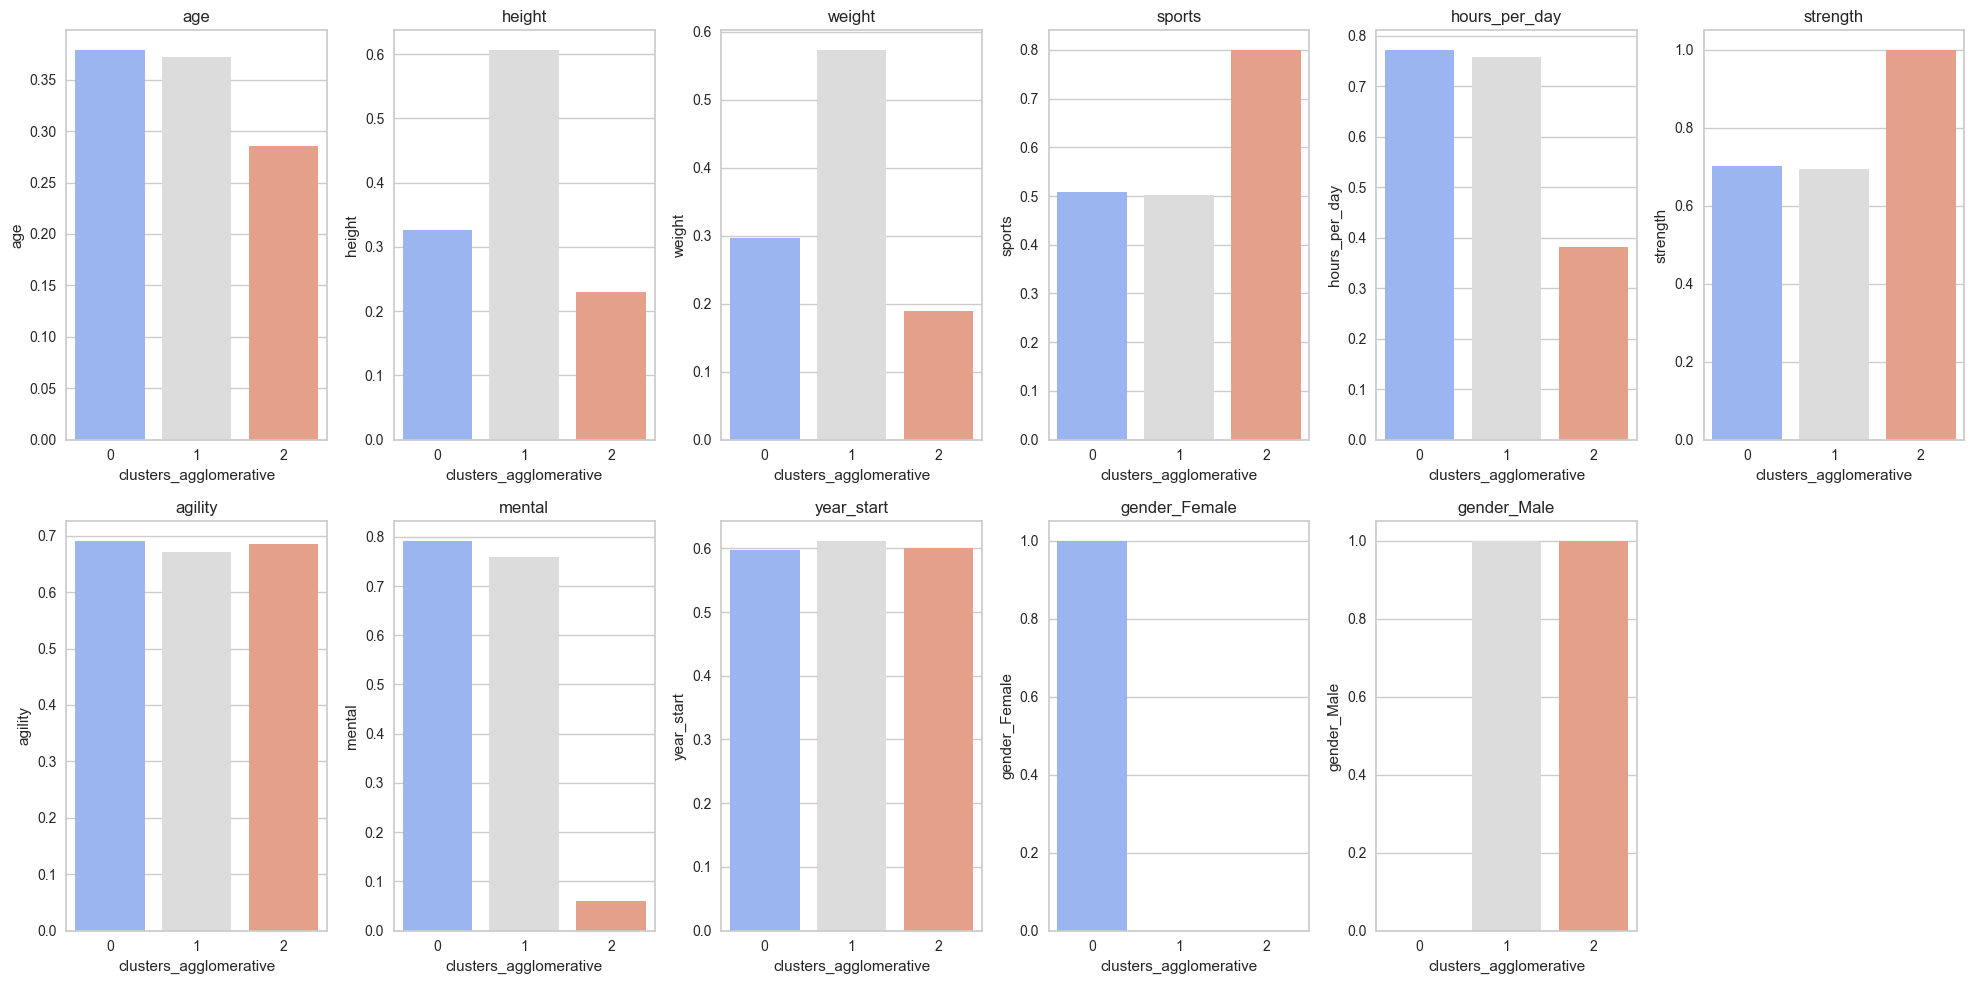

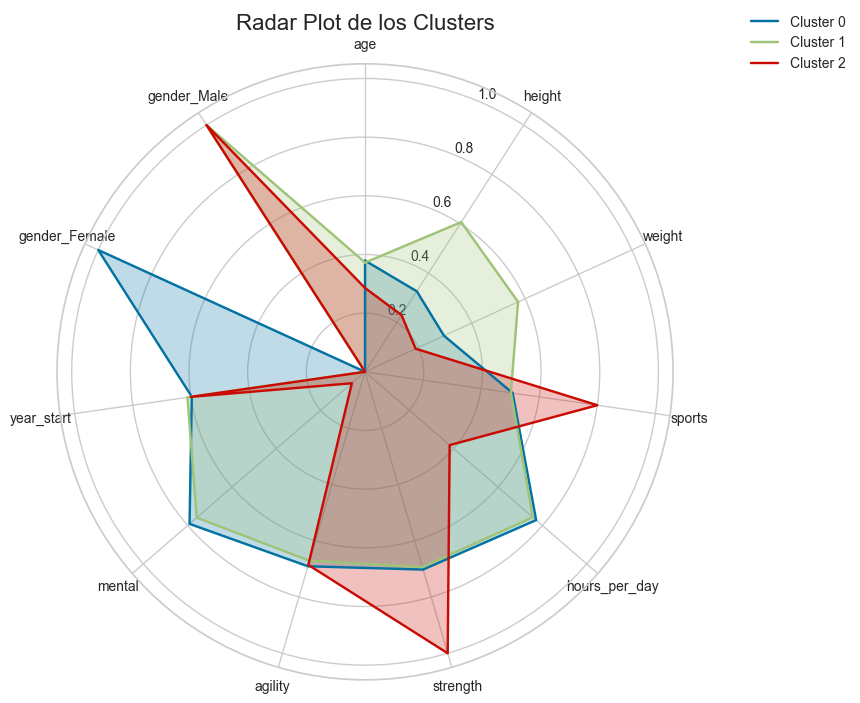

,age,height,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male,clusters_agglomerative
name,,,,,,,,,,,,
Aaron Peavy,0.657143,0.26,0.293103,0.725,1.000000,0.826446,0.781022,1.000000,0.085714,1.0,0.0,0
Abe Rutland,0.514286,0.66,0.603448,0.675,0.068702,0.586777,0.335766,0.185430,0.571429,0.0,1.0,1
Adrian Quinn,0.314286,0.53,0.482759,1.000,0.847328,0.586777,0.781022,1.000000,0.742857,0.0,1.0,1
Alan Beckham,0.600000,0.71,0.724138,0.675,1.000000,0.826446,0.686131,0.602649,0.485714,0.0,1.0,1
Albertha Rodriguez,0.314286,0.12,0.120690,0.800,0.381679,0.694215,1.000000,1.000000,0.742857,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Willie Durham,0.457143,0.67,0.672414,0.675,0.908397,0.198347,0.686131,0.377483,0.628571,0.0,1.0,1
Winnie Larsen,0.371429,0.19,0.103448,0.075,0.427481,0.479339,0.445255,1.000000,0.485714,1.0,0.0,0
Winston Wahl,0.114286,0.73,0.637931,0.450,1.000000,0.586777,0.781022,1.000000,1.000000,0.0,1.0,1


<Figure size 800x550 with 0 Axes>

In [33]:
modelo_aglo = sc.Clustering(df)
modelo_aglo.modelo_aglomerativo(3,"single","cosine",dataframe_original=df,metricas=True,graficas=True)